## Training Sample Options

* Monte Carlo
   - Does NOT (yet) have S2 width diffusion implemented
* Data
   * NR
      * S2 only (Partially unblinded signal sample)
      * S1 and S2 (Full unblinded SR1 Spin-Indpendent dataset)
      * AmBe Calibration
      * Neutron Generator
   * ER
      * Kr83m
* Strategy
   * Use data control sample with S1 and S2 (e.g., SR1 SI)
      * Get depth from drift time, treat as "true"
      * Otherwise, ignore S1 and treat as S2 only control sample
     
      * Train ML model
         * inputs:  S2 waveform (summed or per channel)
         * outputs: depth
      * Optimize sample selections
         * S2 shapes, etc., should agree between control & signal samples (engineer selections to achieve this)
         * Optimize selection to minimize error in depth
   * Caveat: Approximating inelastic NR S2 shape with (partially) elastic NR control sample (S1 & S2)
      * Does "partially" mean largely or rarely?


In [ ]:

####################################################################################################
####################################################################################################


(5341, 247)
run_number
event_number
flashing_PMT
flashing_time
flashing_width
inside_flash
nearest_flash
lone_hit_area
lone_hit_area_fraction_top
lone_hit_center_time
lone_hit_hit_time_std
lone_hit_n_contributing_channels
lone_hit_n_hits
lone_hit_n_saturated_channels
lone_hit_range_50p_area
lone_hit_range_90p_area
lone_hit_x
lone_hit_y
s1_area
s1_center_time
s1_hit_time_std
s1_n_hits
s1_n_saturated_channels
s1_x
s1_y
s2_area
s2_center_time
s2_hit_time_std
s2_n_hits
s2_n_saturated_channels
s2_range_90p_area
s2_x
s2_y
unknown_area
unknown_area_fraction_top
unknown_center_time
unknown_hit_time_std
unknown_n_contributing_channels
unknown_n_hits
unknown_n_saturated_channels
unknown_range_50p_area
unknown_range_90p_area
unknown_x
unknown_y
r_3d_nn_tf
r_correction_3d_nn_tf
r_observed_nn_tf
s1_area_fraction_top_binomial
s1_area_fraction_top_binomial_nothresh
s1_area_fraction_top_probability_hax
s1_area_fraction_top_probability_nothresh
s1_area_lower_injection_fraction
s1_area_upper_injection_f

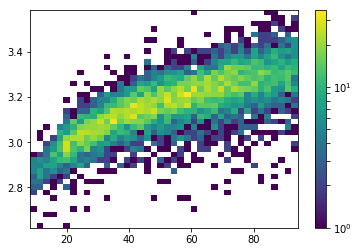

In [15]:

####################################################################################################
####################################################################################################

filname_ambe = '/project/lgrandi/xenon1t/data/180305/all_cuts/AmBe_SR1_pax6.8.0_hax2.4.0_lax1.5.1_cs1LT200_fv1_cuts1.pkl'
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
with open(filname_ambe, 'rb') as f:
    df = pd.read_pickle(f)
    #display(df)
    #x = pickle.load(f)
    
    print(df.shape)
    
    lst = df.columns.values.tolist()   

    for x in lst:
        print(x)
        
    arr_z        = df['z']*-1
    arr_s2_width = df['log10_s2_width']    
    
    plt.hist2d(arr_z, arr_s2_width, bins=40, norm=LogNorm())
    plt.colorbar()
    plt.show()